Mounted at /content/drive
          ds       y  Villas  temperature_2m
0 2022-01-01  1920.0  2337.0            17.9
1 2022-01-02  1944.0  2337.0            18.5
2 2022-01-03  1952.0  2337.0            19.0
3 2022-01-04  2024.0  2337.0            15.5
4 2022-01-05  2080.0  2337.0            13.5


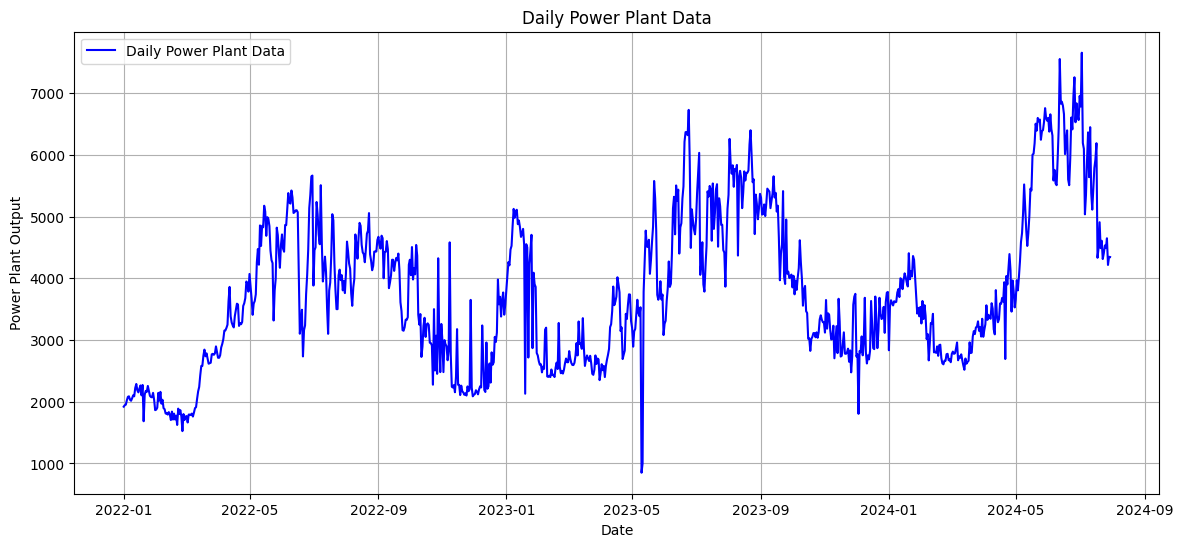

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/My Drive/time_series_analysis_data/cleaned_final_data.csv'
data = pd.read_csv(file_path, parse_dates=['Datetime'])
data.set_index('Datetime', inplace=True)

# Resample the data to daily frequency using the maximum value for each day
data_daily = data.resample('D').max().interpolate(method='time')

# Prepare the DataFrame for Prophet
df_prophet = data_daily.reset_index().rename(columns={'Datetime': 'ds', 'Power Plant': 'y'})

# Check the prepared data
print(df_prophet.head())

# Plot the daily data to visualize
plt.figure(figsize=(14, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Daily Power Plant Data', color='blue')
plt.title('Daily Power Plant Data')
plt.xlabel('Date')
plt.ylabel('Power Plant Output')
plt.legend()
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/kifonkeb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/h1vhdlxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10514', 'data', 'file=/tmp/tmpe_954343/kifonkeb.json', 'init=/tmp/tmpe_954343/h1vhdlxb.json', 'output', 'file=/tmp/tmpe_954343/prophet_modelmbgyu2m0/prophet_model-20240821072515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

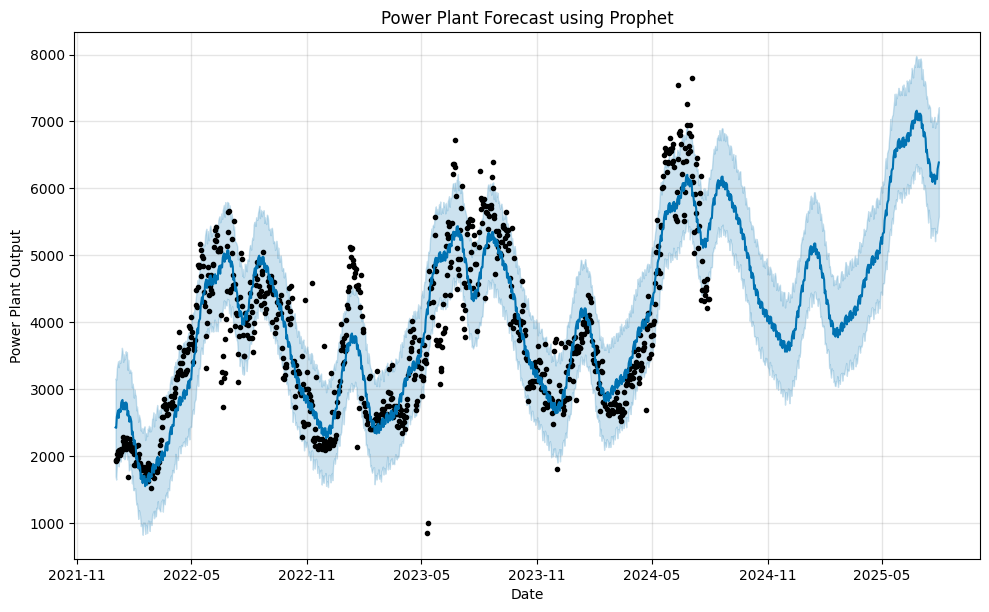

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

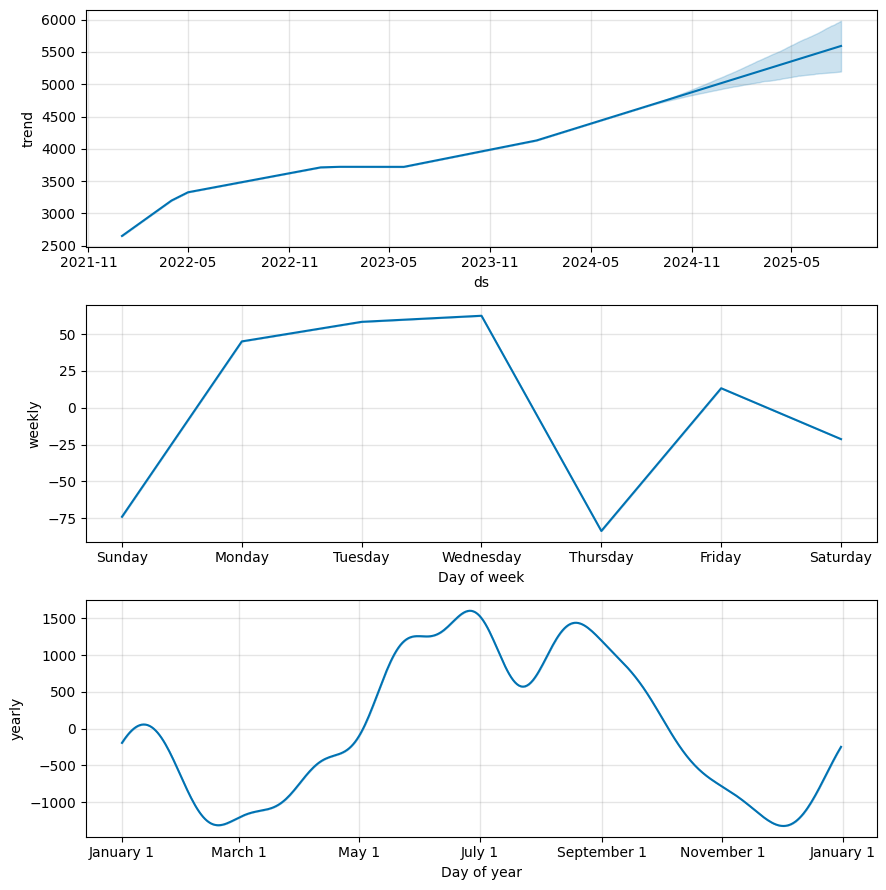

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/My Drive/time_series_analysis_data/cleaned_final_data.csv'
data = pd.read_csv(file_path, parse_dates=['Datetime'])
data.set_index('Datetime', inplace=True)

# Resample the data to daily frequency using max value
data_daily = data.resample('D').max()

# Prepare the data for Prophet
df_prophet = pd.DataFrame({
    'ds': data_daily.index,
    'y': data_daily['Power Plant']
})

# Initialize the Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Fit the model
model.fit(df_prophet)

# Make future predictions (let's forecast for the next year)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Power Plant Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Power Plant Output')
plt.show()

# Plot the forecast components (trend, yearly seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


In [ ]:
# Forward fill NaN values in the regressors
data_daily['Villas'].fillna(method='ffill', inplace=True)
data_daily['temperature_2m'].fillna(method='ffill', inplace=True)

# Alternatively, you can use backward fill or interpolation
# data_daily['Villas'].fillna(method='bfill', inplace=True)
# data_daily['temperature_2m'].fillna(method='bfill', inplace=True)

# data_daily['Villas'].interpolate(method='linear', inplace=True)
# data_daily['temperature_2m'].interpolate(method='linear', inplace=True)
# Prepare the data for Prophet with regressors
df_prophet = pd.DataFrame({
    'ds': data_daily.index,
    'y': data_daily['Power Plant'],
    'Villas': data_daily['Villas'],
    'temperature_2m': data_daily['temperature_2m']
})
# Initialize the Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Add the regressors to the model
model.add_regressor('Villas')
model.add_regressor('temperature_2m')

# Fit the model
model.fit(df_prophet)
# Make future predictions (let's forecast for the next year)
future = model.make_future_dataframe(periods=365)

# You need to include future values for the regressors
future['Villas'] = data_daily['Villas'].values[-365:]  # Adjust based on your forecasting needs
future['temperature_2m'] = data_daily['temperature_2m'].values[-365:]  # Adjust based on your forecasting needs

# Predict using the model
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Power Plant Forecast using Prophet with Regressors')
plt.xlabel('Date')
plt.ylabel('Power Plant Output')
plt.show()

# Plot the forecast components (trend, yearly seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


<ipython-input-4-d26427c00c9d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_daily['Villas'].fillna(method='ffill', inplace=True)
<ipython-input-4-d26427c00c9d>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_daily['temperature_2m'].fillna(method='ffill', inplace=True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/bdhtqt_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/oo6qu3rx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53663', 'data', 'file=/tmp/tmpe_954343/bdhtqt_0.json', 'init=/tmp/tmpe_954343/oo6qu3rx.json', 'output', 'file=/t

ValueError: Length of values (365) does not match length of index (1307)

<ipython-input-5-d31d4cea0c25>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future['Villas'] = data_daily['Villas'].reindex(future['ds']).fillna(method='ffill').values
<ipython-input-5-d31d4cea0c25>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future['temperature_2m'] = data_daily['temperature_2m'].reindex(future['ds']).fillna(method='ffill').values
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatet

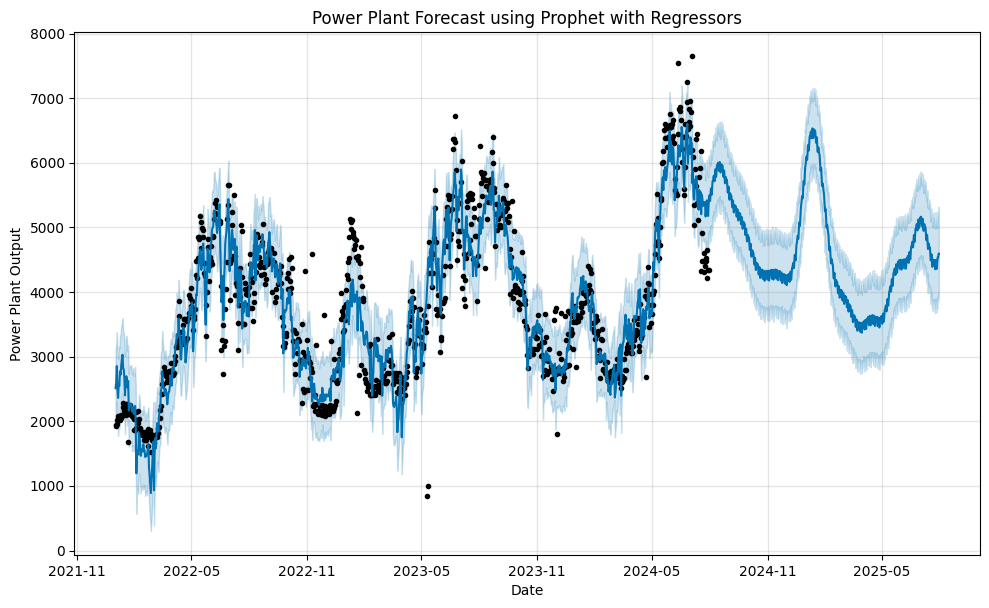

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

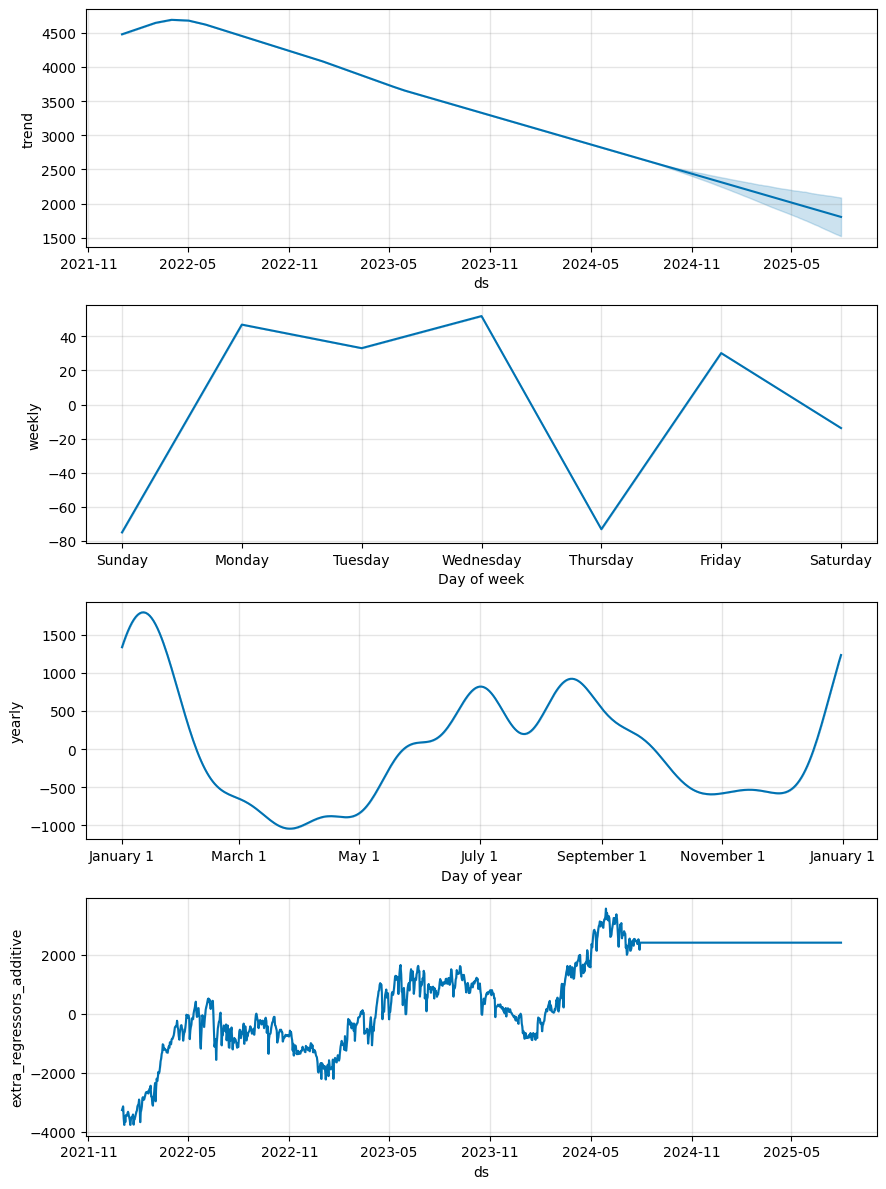

In [ ]:
# Make future predictions (let's forecast for the next year, which is 8760 hours)
future = model.make_future_dataframe(periods=365 * 24, freq='H')

# Ensure the regressor columns match the length of the future DataFrame
# Here, you need to extend or forecast the regressor values into the future as well
# Example: Forward fill or predict future values for regressors if you have a model for them
future['Villas'] = data_daily['Villas'].reindex(future['ds']).fillna(method='ffill').values
future['temperature_2m'] = data_daily['temperature_2m'].reindex(future['ds']).fillna(method='ffill').values

# Predict using the model
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Power Plant Forecast using Prophet with Regressors')
plt.xlabel('Date')
plt.ylabel('Power Plant Output')
plt.show()

# Plot the forecast components (trend, yearly seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/zzm1p01p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/qu2u83yc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9563', 'data', 'file=/tmp/tmpe_954343/zzm1p01p.json', 'init=/tmp/tmpe_954343/qu2u83yc.json', 'output', 'file=/tmp/tmpe_954343/prophet_modelvn6mfvxc/prophet_model-20240821074856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


07:48:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


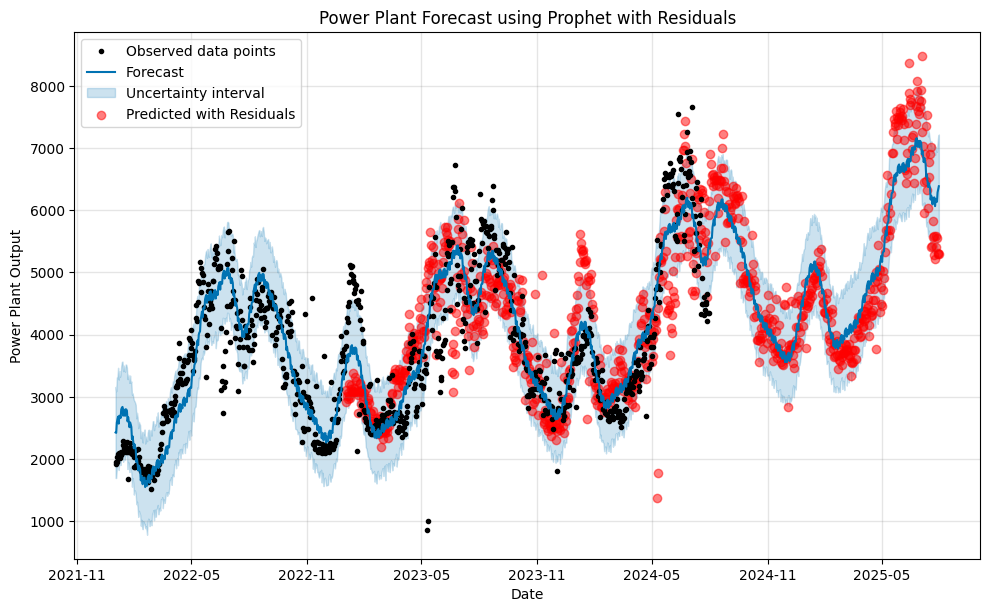

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

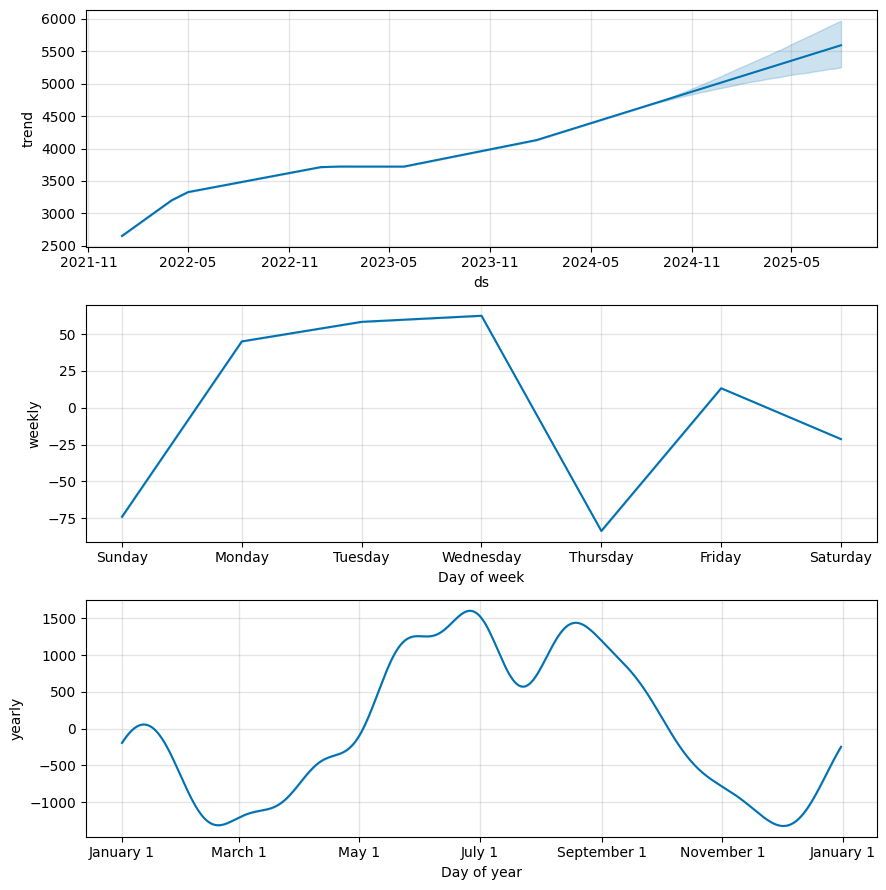

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/My Drive/time_series_analysis_data/cleaned_final_data.csv'
data = pd.read_csv(file_path, parse_dates=['Datetime'])
data.set_index('Datetime', inplace=True)

# Resample the data to daily frequency using max value
data_daily = data.resample('D').max()

# Prepare the data for Prophet
df_prophet = pd.DataFrame({
    'ds': data_daily.index,
    'y': data_daily['Power Plant']
})

# Initialize the Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Fit the model
model.fit(df_prophet)

# Make future predictions (let's forecast for the next year)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Calculate residuals for the actual data period
actual_forecast = forecast.loc[:len(df_prophet) - 1]
residuals = df_prophet['y'].values - actual_forecast['yhat'].values

# Ensure residuals and df_prophet have the same length
residuals = pd.Series(residuals, index=df_prophet['ds'])

# Shift residuals by 365 days to apply them to the forecast for the next year
# Only take the residuals from the same dates one year back
residuals_last_year = residuals.shift(365, freq='D')

# Reindex the residuals to match the future dates in the forecast
residuals_future = residuals_last_year.reindex(forecast['ds'], method='ffill')

# Add the residuals to the forecasted values
forecast['yhat_with_residuals'] = forecast['yhat'] + residuals_future.values

# Plot the original forecast
fig = model.plot(forecast)
plt.title('Power Plant Forecast using Prophet with Residuals')

# Plot the red dots for future predictions
plt.scatter(forecast['ds'], forecast['yhat_with_residuals'], color='red', alpha=0.5, label='Predicted with Residuals')
plt.legend()

plt.xlabel('Date')
plt.ylabel('Power Plant Output')
plt.show()

# Plot the forecast components (trend, yearly seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


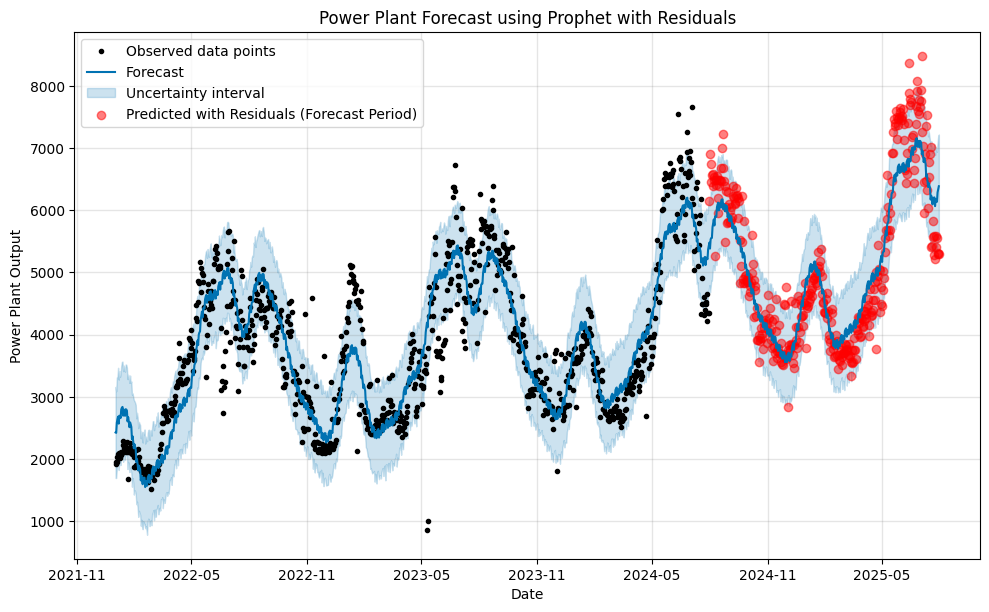

In [ ]:
# Determine where the actual data ends
actual_data_end_date = df_prophet['ds'].max()

# Filter forecast to include only the dates after the actual data ends
forecast_residuals_only = forecast[forecast['ds'] > actual_data_end_date]

# Plot the original forecast
fig = model.plot(forecast)
plt.title('Power Plant Forecast using Prophet with Residuals')

# Plot the red dots for residuals only after the actual data ends
plt.scatter(forecast_residuals_only['ds'],
            forecast_residuals_only['yhat_with_residuals'],
            color='red',
            alpha=0.5,
            label='Predicted with Residuals (Forecast Period)')
plt.legend()

plt.xlabel('Date')
plt.ylabel('Power Plant Output')
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/c2_igztm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/k_orkwkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9011', 'data', 'file=/tmp/tmpe_954343/c2_igztm.json', 'init=/tmp/tmpe_954343/k_orkwkc.json', 'output', 'file=/tmp/tmpe_954343/prophet_model23o06778/prophet_model-20240821075633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


07:56:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


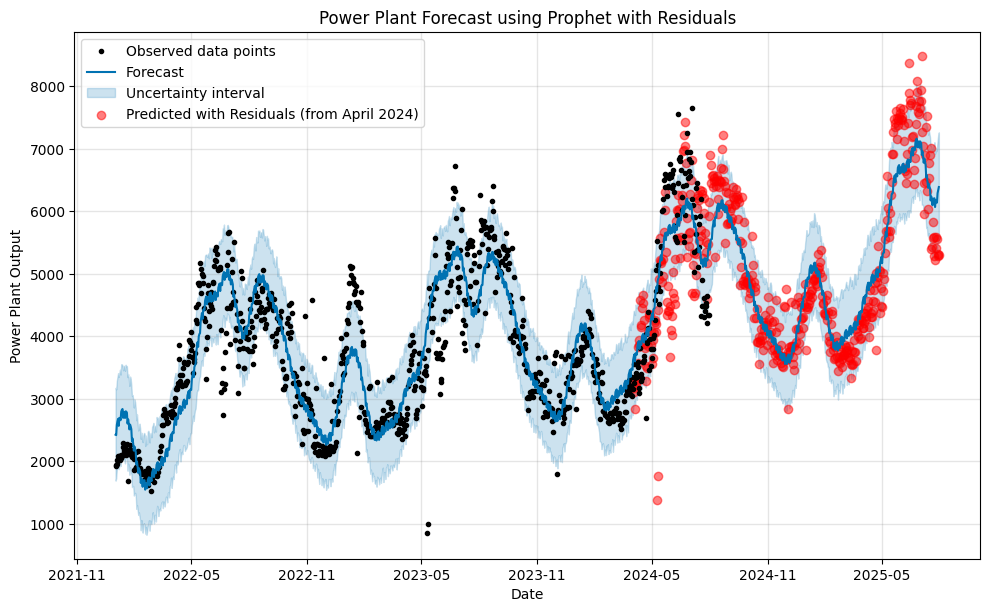

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/My Drive/time_series_analysis_data/cleaned_final_data.csv'
data = pd.read_csv(file_path, parse_dates=['Datetime'])
data.set_index('Datetime', inplace=True)

# Resample the data to daily frequency using max value
data_daily = data.resample('D').max()

# Prepare the data for Prophet
df_prophet = pd.DataFrame({
    'ds': data_daily.index,
    'y': data_daily['Power Plant']
})

# Initialize the Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Fit the model
model.fit(df_prophet)

# Make future predictions (let's forecast for the next year)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Calculate residuals for the actual data period
actual_forecast = forecast.loc[:len(df_prophet) - 1]
residuals = df_prophet['y'].values - actual_forecast['yhat'].values

# Ensure residuals and df_prophet have the same length
residuals = pd.Series(residuals, index=df_prophet['ds'])

# Shift residuals by 365 days to apply them to the forecast for the next year
# Only take the residuals from the same dates one year back
residuals_last_year = residuals.shift(365, freq='D')

# Reindex the residuals to match the future dates in the forecast
residuals_future = residuals_last_year.reindex(forecast['ds'], method='ffill')

# Add the residuals to the forecasted values
forecast['yhat_with_residuals'] = forecast['yhat'] + residuals_future.values

# Define the start date for plotting the residuals
start_date_for_residuals = '2024-04-01'

# Filter the forecast data to include only the dates from start_date_for_residuals
forecast_residuals_filtered = forecast[forecast['ds'] >= start_date_for_residuals]

# Plot the original forecast
fig = model.plot(forecast)
plt.title('Power Plant Forecast using Prophet with Residuals')

# Plot the red dots for residuals starting from the specified date
plt.scatter(forecast_residuals_filtered['ds'],
            forecast_residuals_filtered['yhat_with_residuals'],
            color='red',
            alpha=0.5,
            label='Predicted with Residuals (from April 2024)')
plt.legend()

plt.xlabel('Date')
plt.ylabel('Power Plant Output')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from prophet import Prophet
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/My Drive/time_series_analysis_data/cleaned_final_data.csv'
data = pd.read_csv(file_path, parse_dates=['Datetime'])
data.set_index('Datetime', inplace=True)

# Resample the data to daily frequency using max value
data_daily = data.resample('D').max()

# Prepare the data for Prophet
df_prophet = pd.DataFrame({
    'ds': data_daily.index,
    'y': data_daily['Power Plant']
})

# Initialize the Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Fit the model
model.fit(df_prophet)

# Make future predictions (let's forecast for the next year)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Calculate residuals for the actual data period
actual_forecast = forecast.loc[:len(df_prophet) - 1]
residuals = df_prophet['y'].values - actual_forecast['yhat'].values

# Ensure residuals and df_prophet have the same length
residuals = pd.Series(residuals, index=df_prophet['ds'])

# Shift residuals by 365 days to apply them to the forecast for the next year
residuals_last_year = residuals.shift(365, freq='D')

# Reindex the residuals to match the future dates in the forecast
residuals_future = residuals_last_year.reindex(forecast['ds'], method='ffill')

# Add the residuals to the forecasted values
forecast['yhat_with_residuals'] = forecast['yhat'] + residuals_future.values

# Define the start date for plotting the residuals
start_date_for_residuals = '2024-04-01'

# Filter the forecast data to include only the dates from start_date_for_residuals
forecast_residuals_filtered = forecast[forecast['ds'] >= start_date_for_residuals]

# Create a Plotly figure
fig = go.Figure()

# Plot the residuals as a line
fig.add_trace(go.Scatter(
    x=forecast_residuals_filtered['ds'],
    y=forecast_residuals_filtered['yhat_with_residuals'],
    mode='lines',
    name='Residuals',
    line=dict(color='red')
))

# Customize layout
fig.update_layout(
    title='Power Plant Forecast Residuals (Interactive)',
    xaxis_title='Date',
    yaxis_title='Residuals',
    showlegend=True,
    template='plotly_white'
)

# Show the interactive plot
fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/1pvdedgu.json


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/2r0ro6e2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41881', 'data', 'file=/tmp/tmpe_954343/1pvdedgu.json', 'init=/tmp/tmpe_954343/2r0ro6e2.json', 'output', 'file=/tmp/tmpe_954343/prophet_model3c1d4j9r/prophet_model-20240821110336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:03:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:03:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` 

In [ ]:
# Create a DataFrame for the entire dataset
full_residuals_df = pd.DataFrame({
    'Date': forecast['ds'],
    'Predicted': forecast['yhat'],
    'Predicted with Residuals': forecast['yhat_with_residuals'],
    'Residuals': residuals_future.values  # This includes residuals applied to the forecast
})

# Print the full DataFrame
print(full_residuals_df)

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a Plotly figure
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Plot the predicted values
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Predicted',
    line=dict(color='blue')
))

# Plot the residuals
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_with_residuals'],
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='red')
))

# Customize layout
fig.update_layout(
    title='Power Plant Forecast with Residuals (Full Dataset)',
    xaxis_title='Date',
    yaxis_title='Power Plant Output',
    showlegend=True,
    template='plotly_white'
)

# Show the interactive plot
fig.show()



           Date    Predicted  Predicted with Residuals    Residuals
0    2022-01-01  2426.046208                       NaN          NaN
1    2022-01-02  2420.294306                       NaN          NaN
2    2022-01-03  2583.507457                       NaN          NaN
3    2022-01-04  2637.938113                       NaN          NaN
4    2022-01-05  2679.967872                       NaN          NaN
...         ...          ...                       ...          ...
1302 2025-07-26  6163.257455               5413.225972  -750.031483
1303 2025-07-27  6137.253801               5553.518278  -583.735522
1304 2025-07-28  6288.934135               5291.855992  -997.078143
1305 2025-07-29  6340.218339               5316.853073 -1023.365266
1306 2025-07-30  6387.066631               5302.642864 -1084.423767

[1307 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Calculate upper and lower bounds for residuals using the uncertainty intervals
forecast['residuals_upper'] = forecast['yhat_upper'] - forecast['yhat'] + forecast['yhat_with_residuals']
forecast['residuals_lower'] = forecast['yhat_lower'] - forecast['yhat'] + forecast['yhat_with_residuals']

# Create a Plotly figure
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Plot the residuals with uncertainty intervals
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_with_residuals'],
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='red')
))

# Plot the uncertainty band around residuals
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['residuals_upper'],
    mode='lines',
    fill=None,
    name='Upper Uncertainty (Residuals)',
    line=dict(color='lightgrey'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['residuals_lower'],
    mode='lines',
    fill='tonexty',
    name='Lower Uncertainty (Residuals)',
    line=dict(color='lightgrey'),
    showlegend=True
))

# Customize layout
fig.update_layout(
    title='Power Plant Forecast with Residuals and Uncertainty Intervals',
    xaxis_title='Date',
    yaxis_title='Residuals with Uncertainty',
    showlegend=True,
    template='plotly_white'
)

# Show the interactive plot
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from prophet import Prophet
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Load the data
file_path = '/content/drive/My Drive/time_series_analysis_data/cleaned_final_data.csv'
data = pd.read_csv(file_path, parse_dates=['Datetime'])
data.set_index('Datetime', inplace=True)

# Step 3: Resample the data to daily frequency using max value (you can change it to mean or sum as needed)
data_daily = data.resample('D').max()

# Step 4: Prepare the data for Prophet
df_prophet = pd.DataFrame({
    'ds': data_daily.index,
    'y': data_daily['Power Plant']
})

# Step 5: Initialize the Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Step 6: Fit the model
model.fit(df_prophet)

# Step 7: Make future predictions (let's forecast for the next year)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Step 8: Calculate residuals for the actual data period
actual_forecast = forecast.loc[:len(df_prophet) - 1]
residuals = df_prophet['y'].values - actual_forecast['yhat'].values

# Step 9: Ensure residuals and df_prophet have the same length
residuals = pd.Series(residuals, index=df_prophet['ds'])

# Step 10: Shift residuals by 365 days to apply them to the forecast for the next year
residuals_last_year = residuals.shift(365, freq='D')

# Step 11: Reindex the residuals to match the future dates in the forecast
residuals_future = residuals_last_year.reindex(forecast['ds'], method='ffill')

# Step 12: Add the residuals to the forecasted values
forecast['yhat_with_residuals'] = forecast['yhat'] + residuals_future.values

# Step 13: Calculate upper and lower bounds for residuals using the uncertainty intervals
forecast['residuals_upper'] = forecast['yhat_upper'] - forecast['yhat'] + forecast['yhat_with_residuals']
forecast['residuals_lower'] = forecast['yhat_lower'] - forecast['yhat'] + forecast['yhat_with_residuals']

# Step 14: Create an interactive Plotly figure
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Plot the residuals with uncertainty intervals for the entire dataset
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_with_residuals'],
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='red')
))

# Plot the uncertainty band around residuals for the entire dataset
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['residuals_upper'],
    mode='lines',
    fill=None,
    name='Upper Uncertainty (Residuals)',
    line=dict(color='lightgrey'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['residuals_lower'],
    mode='lines',
    fill='tonexty',
    name='Lower Uncertainty (Residuals)',
    line=dict(color='lightgrey'),
    showlegend=True
))

# Step 15: Customize layout
fig.update_layout(
    title='Power Plant Forecast with Residuals and Uncertainty Intervals (Full Dataset)',
    xaxis_title='Date',
    yaxis_title='Residuals with Uncertainty',
    showlegend=True,
    template='plotly_white'
)

# Step 16: Show the interactive plot
fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/gq26hkcf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/b2s55_8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81957', 'data', 'file=/tmp/tmpe_954343/gq26hkcf.json', 'init=/tmp/tmpe_954343/b2s55_8b.json', 'output', 'file=/tmp/tmpe_954343/prophet_modelwmg8oz1n/prophet_model-20240821112233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


11:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from prophet import Prophet
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Load the data
file_path = '/content/drive/My Drive/time_series_analysis_data/cleaned_final_data.csv'
data = pd.read_csv(file_path, parse_dates=['Datetime'])
data.set_index('Datetime', inplace=True)

# Step 3: Resample the data to daily frequency using max value (you can change it to mean or sum as needed)
data_daily = data.resample('D').max()

# Step 4: Prepare the data for Prophet
df_prophet = pd.DataFrame({
    'ds': data_daily.index,
    'y': data_daily['Power Plant']
})

# Step 5: Initialize the Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Step 6: Fit the model
model.fit(df_prophet)

# Step 7: Make future predictions (let's forecast for the next year)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Step 8: Calculate residuals for the actual data period
actual_forecast = forecast.loc[:len(df_prophet) - 1]
residuals = df_prophet['y'].values - actual_forecast['yhat'].values

# Step 9: Ensure residuals and df_prophet have the same length
residuals = pd.Series(residuals, index=df_prophet['ds'])

# Step 10: Shift residuals by 365 days to apply them to the forecast for the next year
residuals_last_year = residuals.shift(365, freq='D')

# Step 11: Reindex the residuals to match the future dates in the forecast
residuals_future = residuals_last_year.reindex(forecast['ds'], method='ffill')

# Step 12: Add the residuals to the forecasted values
forecast['yhat_with_residuals'] = forecast['yhat'] + residuals_future.values

# Step 13: Calculate upper and lower bounds for residuals using the uncertainty intervals
forecast['residuals_upper'] = forecast['yhat_upper'] - forecast['yhat'] + forecast['yhat_with_residuals']
forecast['residuals_lower'] = forecast['yhat_lower'] - forecast['yhat'] + forecast['yhat_with_residuals']

# Step 14: Create an interactive Plotly figure
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Plot the residuals with uncertainty intervals for the entire dataset
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_with_residuals'],
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='red')
))

# Plot the uncertainty band around residuals for the entire dataset
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['residuals_upper'],
    mode='lines',
    fill=None,
    name='Upper Uncertainty (Residuals)',
    line=dict(color='lightgrey'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['residuals_lower'],
    mode='lines',
    fill='tonexty',
    name='Lower Uncertainty (Residuals)',
    line=dict(color='lightgrey'),
    showlegend=True
))

# Step 15: Customize layout
fig.update_layout(
    title='Power Plant Forecast with Residuals and Uncertainty Intervals (Full Dataset)',
    xaxis_title='Date',
    yaxis_title='Residuals with Uncertainty',
    showlegend=True,
    template='plotly_white',
    xaxis=dict(
        range=[df_prophet['ds'].min(), forecast['ds'].max()]  # Ensure full date range is shown
    )
)

# Step 16: Show the interactive plot
fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/oc93n1ex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/1kifmzxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8538', 'data', 'file=/tmp/tmpe_954343/oc93n1ex.json', 'init=/tmp/tmpe_954343/1kifmzxs.json', 'output', 'file=/tmp/tmpe_954343/prophet_modelc5xgm4p5/prophet_model-20240821113107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


11:31:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from prophet import Prophet
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Load the data
file_path = '/content/drive/My Drive/time_series_analysis_data/cleaned_final_data.csv'
data = pd.read_csv(file_path, parse_dates=['Datetime'])
data.set_index('Datetime', inplace=True)

# Step 3: Resample the data to daily frequency using max value
data_daily = data.resample('D').max()

# Step 4: Prepare the data for Prophet
df_prophet = pd.DataFrame({
    'ds': data_daily.index,
    'y': data_daily['Power Plant']
})

df_prophet.head()

# Step 5: Initialize the Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Step 6: Fit the model
model.fit(df_prophet)

# Step 7: Make future predictions (let's forecast for the next year)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Step 8: Calculate residuals for the actual data period
actual_forecast = forecast.loc[:len(df_prophet) - 1]
residuals = df_prophet['y'].values - actual_forecast['yhat'].values

# Step 9: Ensure residuals and df_prophet have the same length
residuals = pd.Series(residuals, index=df_prophet['ds'])

# Step 10: Shift residuals by 365 days to apply them to the forecast for the next year
residuals_last_year = residuals.shift(365, freq='D')

# Step 11: Reindex the residuals to match the future dates in the forecast
residuals_future = residuals_last_year.reindex(forecast['ds'], method='ffill')

# Step 12: Add the residuals to the forecasted values
forecast['yhat_with_residuals'] = forecast['yhat'] + residuals_future.values

# Step 13: Create an interactive Plotly figure
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Plot the residuals adjusted forecast for the entire dataset
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_with_residuals'],
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='red')
))

# Plot the uncertainty band around the forecasted residuals (not actual data)
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    mode='lines',
    fill=None,
    name='Upper Uncertainty',
    line=dict(color='lightgrey'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    mode='lines',
    fill='tonexty',
    name='Lower Uncertainty',
    line=dict(color='lightgrey'),
    showlegend=True
))

# Step 14: Customize layout
fig.update_layout(
    title='Power Plant Forecast with Residuals and Uncertainty Intervals (Corrected)',
    xaxis_title='Date',
    yaxis_title='Residuals with Uncertainty',
    showlegend=True,
    template='plotly_white',
    xaxis=dict(
        range=[df_prophet['ds'].min(), forecast['ds'].max()]  # Ensure full date range is shown
    )
)

# Step 15: Show the interactive plot
fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/wnyud4t7.json


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/cz7tcxs7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77684', 'data', 'file=/tmp/tmpe_954343/wnyud4t7.json', 'init=/tmp/tmpe_954343/cz7tcxs7.json', 'output', 'file=/tmp/tmpe_954343/prophet_modelbx4pzo0o/prophet_model-20240821113355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:33:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:33:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` 

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from prophet import Prophet
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Load the data
file_path = '/content/drive/My Drive/time_series_analysis_data/cleaned_final_data.csv'
data = pd.read_csv(file_path, parse_dates=['Datetime'])
data.set_index('Datetime', inplace=True)

# Step 3: Resample the data to daily frequency using max value
data_daily = data.resample('D').max()

# Step 4: Prepare the data for Prophet
df_prophet = pd.DataFrame({
    'ds': data_daily.index,
    'y': data_daily['Power Plant']
})

# Step 5: Initialize the Prophet model with yearly seasonality
model = Prophet(yearly_seasonality=True)

# Step 6: Fit the model
model.fit(df_prophet)

# Step 7: Make future predictions (forecast only after the last date in the data)
future = model.make_future_dataframe(periods=365, include_history=True)
forecast = model.predict(future)

# Step 8: Calculate residuals for the actual data period
actual_forecast = forecast.loc[forecast['ds'] <= df_prophet['ds'].max()]
residuals = df_prophet['y'].values - actual_forecast['yhat'].values

# Step 9: Ensure residuals and df_prophet have the same length
residuals = pd.Series(residuals, index=df_prophet['ds'])

# Step 10: Shift residuals by 365 days to apply them to the forecast for the next year
residuals_last_year = residuals.shift(365, freq='D')

# Step 11: Reindex the residuals to match the future dates in the forecast
residuals_future = residuals_last_year.reindex(forecast['ds'], method='ffill')

# Step 12: Add the residuals to the forecasted values
forecast['yhat_with_residuals'] = forecast['yhat'] + residuals_future.values

# Step 13: Create an interactive Plotly figure
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Plot the residuals adjusted forecast for the entire dataset
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_with_residuals'],
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='red')
))

# Plot the uncertainty band around the forecasted residuals (not actual data)
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    mode='lines',
    fill=None,
    name='Upper Uncertainty',
    line=dict(color='lightgrey'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    mode='lines',
    fill='tonexty',
    name='Lower Uncertainty',
    line=dict(color='lightgrey'),
    showlegend=True
))

# Step 14: Customize layout
fig.update_layout(
    title='Power Plant Forecast with Residuals and Uncertainty Intervals (Corrected)',
    xaxis_title='Date',
    yaxis_title='Residuals with Uncertainty',
    showlegend=True,
    template='plotly_white',
    xaxis=dict(
        range=[df_prophet['ds'].min(), forecast['ds'].max()]  # Ensure full date range is shown
    )
)

# Step 15: Show the interactive plot
fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/nu15ewub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_954343/vqgi1u2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5615', 'data', 'file=/tmp/tmpe_954343/nu15ewub.json', 'init=/tmp/tmpe_954343/vqgi1u2n.json', 'output', 'file=/tmp/tmpe_954343/prophet_modelrfr074dy/prophet_model-20240821121148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


12:11:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

